# Import Packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# requirements
## corner: pip install corner
## emcee: pip install emcee
from linear_mcmc import *

## Helper function for plotting

In [4]:
# Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=6, width=1., direction=inout)
        ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)  

        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=6, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout) 

        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=6, width=1.0, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)     

        # Set font size for x-axis and y-axis tick labels
        for tick in ax.get_xticklabels():
            tick.set_fontsize(fontsize)
        for tick in ax.get_yticklabels():
            tick.set_fontsize(fontsize) 
        
        return x_ax, y_ax

# Import Data

In [ ]:
# To convert from DECam g-z to ACS g-z, use the scale factor and offset:
# a = 1.042
# b = -0.012
# sigma = 0.018
# x = 0
# shift = 0

In [2]:
# Define the path to your CSV file
#csv_file_path = '/Users/Joe/data/SBF-Calibration2024/calibration-19Dec2024.csv'
#csv_file_path = '/Users/Joe/data/SBF-Calibration2024/calibration-1Jan2025.csv'
csv_file_path = '/Users/Joe/data/SBF-Calibration2024/calibration-27Jan2025.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df

,Name,mM_TRGB,mM_TRGBsig,mM_TRGBsigtot,mM_TRGB_cluster,mM_TRGB_cluster_sig,mM_SBF_cluster,mM_SBF_cluster_sig,mM_SBF_ACS,mM_SBF_ACS_sig,...,DECamgic0,DECamgic1,DECamgic2,DECamgic5,DC2PSc0,DC2PSc1,DC2PSc2,DC2PSc5,DC2PSc1sig,DC2PSc2sig
0,N4458,NaN,NaN,NaN,31.055,0.035,31.09,0.085,31.063,0.070,...,1.013,1.014,1.019,NaN,1.168,1.159,1.140,NaN,0.017,0.017
1,N4472,31.091,0.032,0.071,31.055,0.032,31.09,0.085,31.116,0.075,...,1.198,1.184,1.176,1.165,1.396,1.387,1.379,1.366,0.017,0.017
2,N4489,NaN,NaN,NaN,31.055,0.035,31.09,0.085,30.935,0.069,...,1.104,0.993,0.984,NaN,1.152,1.132,1.121,NaN,0.018,0.018
3,N4649,31.061,0.034,0.072,31.055,0.034,31.09,0.085,31.082,0.079,...,1.237,1.222,1.193,1.165,1.459,1.442,1.409,1.373,0.018,0.018
4,N4636,31.120,0.035,0.072,31.055,0.035,NaN,NaN,NaN,NaN,...,1.174,1.154,1.123,1.093,1.374,1.351,1.312,1.273,0.018,0.018
5,N4552,30.933,0.041,0.075,31.055,0.041,31.09,0.085,31.021,0.073,...,1.193,1.167,1.139,1.113,1.392,1.365,1.334,1.289,0.018,0.018
6,N4697,30.330,0.036,0.073,30.330,0.036,NaN,NaN,30.491,0.065,...,1.127,1.096,1.073,1.047,1.317,1.283,1.259,1.235,0.018,0.018
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,IC2006,NaN,NaN,NaN,31.424,0.035,31.51,0.053,31.525,0.086,...,1.143,1.119,1.097,1.055,1.310,1.287,1.261,1.211,0.020,0.020
9,N1344,NaN,NaN,NaN,31.424,0.035,31.51,0.053,31.603,0.068,...,1.073,1.053,1.028,1.015,1.230,1.213,1.189,1.169,0.017,0.017


In [ ]:
df = pd.read_csv(csv_file_path)
df = df[["mbar110", "mbar110sig","DMoffset","ACSgz2021","ACSgzsig","gzoffset"]].dropna()

x = df.ACSgz2021.values - df.gzoffset.values
y = df.mbar110.values + df.DMoffset.values
xerr = df.ACSgzsig.values
yerr=df.mbar110sig.values

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

##----------

In [ ]:
# mbar vs ACS (g-z) with Virgo offset to Fornax (only four galaxies in Virgo)

df = pd.read_csv(csv_file_path)
df = df[["mbar110c0","mbar110c0sig","mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","DMoffset","ACSgzc0","ACSgzc1","ACSgzc2","ACSgzsig","gzoffset"]].dropna()

x0 = df.ACSgzc0.values - df.gzoffset.values
x1 = df.ACSgzc1.values - df.gzoffset.values
x2 = df.ACSgzc2.values - df.gzoffset.values
x = np.concatenate((x0, x1, x2), axis=0)
y0 = df.mbar110c0.values + df.DMoffset.values
y1 = df.mbar110c1.values + df.DMoffset.values
y2 = df.mbar110c2.values + df.DMoffset.values
y = np.concatenate((y0, y1, y2), axis=0)
xerr = df.ACSgzsig.values
xerr = np.concatenate((xerr, xerr, xerr), axis=0)
yerr0 = df.mbar110c0sig.values
yerr1 = df.mbar110c1sig.values
yerr2 = df.mbar110c2sig.values
yerr = np.concatenate((yerr0, yerr1, yerr2), axis=0)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/mbar_c012_ACS145_2Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'ACS $(g_{{475}}{{-}}z_{{850}})-1.45$'
ylabel=r'$\overline{{m}}_{{110}}$'

In [ ]:
# mbar vs PS (g-z) with Virgo offset to Fornax
# PS translated to ACS frame

df = pd.read_csv(csv_file_path)
df = df[["mbar110c0","mbar110c0sig","mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","DMoffset","PSgzc0","PSgzc1","PSgzc2","PSgzc0sig","PSgzc1sig","PSgzc2sig","gzoffset"]].dropna()

x0 = (df.PSgzc0.values - df.gzoffset.values)*1.011 + 0.093
x1 = (df.PSgzc1.values - df.gzoffset.values)*1.011 + 0.093
x2 = (df.PSgzc2.values - df.gzoffset.values)*1.011 + 0.093
x = np.concatenate((x0, x1, x2), axis=0)
y0 = df.mbar110c0.values + df.DMoffset.values
y1 = df.mbar110c1.values + df.DMoffset.values
y2 = df.mbar110c2.values + df.DMoffset.values
y = np.concatenate((y0, y1, y2), axis=0)
xerr0 = df.PSgzc0sig.values
xerr1 = df.PSgzc1sig.values
xerr2 = df.PSgzc2sig.values
xerr = np.concatenate((xerr0, xerr1, xerr2), axis=0)
yerr0 = df.mbar110c0sig.values
yerr1 = df.mbar110c1sig.values
yerr2 = df.mbar110c2sig.values
yerr = np.concatenate((yerr0, yerr1, yerr2), axis=0)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/mbar_c012_PS145_2Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'ACS from PS $(g{-}z)-1.45$'
ylabel=r'$\overline{{m}}_{{110}}$'

In [ ]:
# mbar vs DECam (g-z) with Virgo offset to Fornax

df = pd.read_csv(csv_file_path)
df = df[["mbar110c0","mbar110c0sig","mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","DMoffset","DECamgzc0","DECamgzc1","DECamgzc2","DECamgzc0sig","DECamgzc1sig","DECamgzc2sig","gzoffset"]].dropna()

x0 = (df.DECamgzc0.values - df.gzoffset.values)
x1 = (df.DECamgzc1.values - df.gzoffset.values)
x2 = (df.DECamgzc2.values - df.gzoffset.values)
x = np.concatenate((x0, x1, x2), axis=0)
y0 = df.mbar110c0.values + df.DMoffset.values
y1 = df.mbar110c1.values + df.DMoffset.values
y2 = df.mbar110c2.values + df.DMoffset.values
y = np.concatenate((y0, y1, y2), axis=0)
xerr0 = df.DECamgzc0sig.values
xerr1 = df.DECamgzc1sig.values
xerr2 = df.DECamgzc2sig.values
xerr = np.concatenate((xerr0, xerr1, xerr2), axis=0)
yerr0 = df.mbar110c0sig.values
yerr1 = df.mbar110c1sig.values
yerr2 = df.mbar110c2sig.values
yerr = np.concatenate((yerr0, yerr1, yerr2), axis=0)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/mbar_c012_DECam145_17Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'DECam $(g{-}z)-1.45$'
ylabel=r'$\overline{{m}}_{{110}}$'

In [ ]:
# Mbar vs. ACS (g-z) for 7 calibrators (No ACS colors for N4636) using the c1 aperture
df = pd.read_csv(csv_file_path)
df = df[["Mbar110c1","Mbar110c1sig","ACSgz2021","ACSgzsig","gzoffset"]].dropna()

x = df.ACSgz2021.values - df.gzoffset.values
y = df.Mbar110c1.values
xerr = df.ACSgzsig.values
yerr= df.Mbar110c1sig

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbarc1_ACS145_2Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'ACS $(g_{{475}}{{-}}z_{{850}})-1.45$'
ylabel=r'$\overline{{M}}_{{110}}$'

In [ ]:
# Mbar vs. ACS (g-z) for 7 calibrators (No ACS colors for N4636) using the c1 aperture, no legend
df = pd.read_csv(csv_file_path)
df = df[["Mbar110c1","Mbar110c1sig","ACSgz2021","ACSgzsig","gzoffset"]].dropna()

x = df.ACSgz2021.values #- df.gzoffset.values
y = df.Mbar110c1.values
xerr = df.ACSgzsig.values
yerr= df.Mbar110c1sig

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbarc1_ACS_2Jan2025.pdf"
figtitle = " "
legend = False
xlabel=r'ACS $(g_{{475}}{{-}}z_{{850}})$'
ylabel=r'$\overline{{M}}_{{110}}$'

In [ ]:
# Mbar vs. ACS (g-z) for 7 calibrators (No ACS colors for N4636)
df = pd.read_csv(csv_file_path)
df = df[["Mbar110","Mbar110sig","ACSgz2021","ACSgzsig","gzoffset"]].dropna()

x = df.ACSgz2021.values - df.gzoffset.values
y = df.Mbar110.values
xerr = df.ACSgzsig.values
yerr= df.Mbar110sig

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_ACS145_2Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'ACS $(g_{{475}}{{-}}z_{{850}})-1.45$'
ylabel=r'$\overline{{M}}_{{110}}$'

In [ ]:
# Mbar vs. ACS (g-z) for 7 calibrators (without offset and legend this time for the plot)
df = pd.read_csv(csv_file_path)
df = df[["Mbar110","Mbar110sig","ACSgz2021","ACSgzsig","gzoffset"]].dropna()

x = df.ACSgz2021.values #- df.gzoffset.values
y = df.Mbar110.values
xerr = df.ACSgzsig.values
yerr= df.Mbar110sig

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_ACS_8Jan2025.pdf"
figtitle = " "
legend = False
xlabel=r'ACS $(g_{{475}}{{-}}z_{{850}})$'
ylabel=r'$\overline{{M}}_{{110}}$'

In [ ]:
# Mbar vs. DECam c1 (g-z) using 2009 m-M from ACS SBF (13 including N4552, N4697, cluster distances)
df = pd.read_csv(csv_file_path)
df = df[["mM_SBF_cluster","mM_SBF_cluster_sig","mbar110","mbar110sig","DECamgzc1","DECamgzc1sig","gzoffset"]].dropna()

x = df.DECamgzc1.values - df.gzoffset.values
y = df.mbar110.values - df.mM_SBF_cluster.values
xerr = df.DECamgzc1sig.values
yerr= np.sqrt(df.mbar110sig.values**2 + df.mM_SBF_cluster_sig.values**2)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar2009_DECam_cluster_17Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'DECam c1 $(g{{-}}z)-1.45$'
ylabel=r'$\overline{{M}}_{{110}}$'

In [ ]:
# Mbar vs. ACS (g-z) using 2009 m-M from ACS SBF (12 including N4552, cluster distances)
df = pd.read_csv(csv_file_path)
df = df[["mM_SBF_cluster","mM_SBF_cluster_sig","mbar110","mbar110sig","ACSgz2021","ACSgzsig","gzoffset"]].dropna()

x = df.ACSgz2021.values - df.gzoffset.values
y = df.mbar110.values - df.mM_SBF_cluster.values
xerr = df.ACSgzsig.values
yerr= np.sqrt(df.mbar110sig.values**2 + df.mM_SBF_cluster_sig.values**2)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar2009_ACS_cluster_2Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'ACS $(g_{{475}}{{-}}z_{{850}})-1.45$'
ylabel=r'$\overline{{M}}_{{110}}$'

In [ ]:
# Mbar vs. ACS (g-z) using 2009 m-M from ACS SBF (13 including N4552 and N4697, individual distances)
df = pd.read_csv(csv_file_path)
df = df[["mM_SBF_ACS","mM_SBF_ACS_sig","mbar110","mbar110sig","ACSgz2021","ACSgzsig","gzoffset"]].dropna()

x = df.ACSgz2021.values - df.gzoffset.values
y = df.mbar110.values - df.mM_SBF_ACS.values
xerr = df.ACSgzsig.values
yerr= np.sqrt(df.mbar110sig.values**2 + df.mM_SBF_ACS_sig.values**2)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar2009_ACS_individual_2Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'ACS $(g_{{475}}{{-}}z_{{850}})-1.45$'
ylabel=r'$\overline{{M}}_{{110}}$'

In [ ]:
# Mbar vs. PS (g-z) for 5 Virgo calibrators
# PS transated to ACS colors

df = pd.read_csv(csv_file_path)
df = df[["Mbar110","Mbar110sig","PSgz","PSgzsig","gzoffset"]].dropna()

x = (df.PSgz.values*1.011 + 0.093) - df.gzoffset.values
y = df.Mbar110.values
xerr = df.PSgzsig.values
yerr= df.Mbar110sig.values

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_PS145_12Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'ACS from PS $(g{-}z)-1.45$'
ylabel=r'$\overline{{M}}_{{110}}$'

In [ ]:
# Mbar vs. PS (g-z) for 5 Virgo calibrators, no legend or shift
# PS transated to ACS colors

df = pd.read_csv(csv_file_path)
df = df[["Mbar110","Mbar110sig","PSgz","PSgzsig","gzoffset"]].dropna()

x = ((df.PSgz.values)*1.011 + 0.093)
y = df.Mbar110.values
xerr = df.PSgzsig.values
yerr= df.Mbar110sig.values

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_PS_12Jan2025.pdf"
figtitle = " "
legend = False
xlabel=r'ACS from PS $(g{-}z)$'
ylabel=r'$\overline{{M}}_{{110}}$'

In [ ]:
# Mbar vs. PS (g-z) for 5 Virgo calibrators

df = pd.read_csv(csv_file_path)
df = df[["Mbar110","Mbar110sig","PSgz","PSgzsig","gzoffset"]].dropna()

x = (df.PSgz.values) - 1.35
y = df.Mbar110.values
xerr = df.PSgzsig.values
yerr= df.Mbar110sig.values

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_PS135_18Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'ACS from PS $(g{-}z)-1.35$'
ylabel=r'$\overline{{M}}_{{110}}$'

In [ ]:
# Mbar vs. PS (g-z) for 5 Virgo calibrators, no legend or shift

df = pd.read_csv(csv_file_path)
df = df[["Mbar110","Mbar110sig","PSgz","PSgzsig","gzoffset"]].dropna()

x = (df.PSgz.values)
y = df.Mbar110.values
xerr = df.PSgzsig.values
yerr= df.Mbar110sig.values

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_PS_18Jan2025.pdf"
figtitle = " "
legend = False
xlabel=r'PS $(g{-}z)$'
ylabel=r'$\overline{{M}}_{{110}}$'

In [ ]:
# Mbar vs PS (g-z) for c0, c1, c2 annuli (5 Virgo galaxies)
# PS translated to ACS frame

df = pd.read_csv(csv_file_path)
df = df[["mbar110c0","mbar110c0sig","mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","mM_TRGB","mM_TRGBsig","PSgzc0","PSgzc1","PSgzc2","PSgzc0sig","PSgzc1sig","PSgzc2sig","gzoffset"]].dropna()

x0 = (df.PSgzc0.values - df.gzoffset.values)*1.011 + 0.093
x1 = (df.PSgzc1.values - df.gzoffset.values)*1.011 + 0.093
x2 = (df.PSgzc2.values - df.gzoffset.values)*1.011 + 0.093
x = np.concatenate((x0, x1, x2), axis=0)
y0 = df.mbar110c0.values - df.mM_TRGB.values
y1 = df.mbar110c1.values - df.mM_TRGB.values
y2 = df.mbar110c2.values - df.mM_TRGB.values
y = np.concatenate((y0, y1, y2), axis=0)
xerr0 = df.PSgzc0sig.values
xerr1 = df.PSgzc1sig.values
xerr2 = df.PSgzc2sig.values
xerr = np.concatenate((xerr0, xerr1, xerr2), axis=0)
yerr0 = np.sqrt(df.mbar110c0sig.values**2 + df.mM_TRGBsig.values**2)
yerr1 = np.sqrt(df.mbar110c1sig.values**2 + df.mM_TRGBsig.values**2)
yerr2 = np.sqrt(df.mbar110c2sig.values**2 + df.mM_TRGBsig.values**2)
yerr = np.concatenate((yerr0, yerr1, yerr2), axis=0)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_c012_PS145_2Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'ACS from PS $(g{-}z)-1.45$'
ylabel=r'$\overline{{M}}_{{110}}$'

In [ ]:
# Mbar vs PS (g-z) for c0, c1, c2 annuli (5 Virgo galaxies) without shift and legend (for plot)
# PS translated to ACS frame

df = pd.read_csv(csv_file_path)
df = df[["mbar110c0","mbar110c0sig","mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","mM_TRGB","mM_TRGBsig","PSgzc0","PSgzc1","PSgzc2","PSgzc0sig","PSgzc1sig","PSgzc2sig","gzoffset"]].dropna()

x0 = (df.PSgzc0.values)*1.011 + 0.093
x1 = (df.PSgzc1.values)*1.011 + 0.093
x2 = (df.PSgzc2.values)*1.011 + 0.093
x = np.concatenate((x0, x1, x2), axis=0)
y0 = df.mbar110c0.values - df.mM_TRGB.values
y1 = df.mbar110c1.values - df.mM_TRGB.values
y2 = df.mbar110c2.values - df.mM_TRGB.values
y = np.concatenate((y0, y1, y2), axis=0)
xerr0 = df.PSgzc0sig.values
xerr1 = df.PSgzc1sig.values
xerr2 = df.PSgzc2sig.values
xerr = np.concatenate((xerr0, xerr1, xerr2), axis=0)
yerr0 = np.sqrt(df.mbar110c0sig.values**2 + df.mM_TRGBsig.values**2)
yerr1 = np.sqrt(df.mbar110c1sig.values**2 + df.mM_TRGBsig.values**2)
yerr2 = np.sqrt(df.mbar110c2sig.values**2 + df.mM_TRGBsig.values**2)
yerr = np.concatenate((yerr0, yerr1, yerr2), axis=0)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_c012_PS145_noshift_2Jan2025.pdf"
figtitle = " "
legend = False
xlabel=r'ACS from PanSTARRS $(g{-}z)$'
ylabel=r'$\overline{{M}}_{{110}}$'

In [ ]:
# Mbar vs DECam (g-z) for c0, c1, c2 annuli

df = pd.read_csv(csv_file_path)
df = df[["mbar110c0","mbar110c0sig","mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","mM_TRGB","mM_TRGBsig","DECamgzc0","DECamgzc1","DECamgzc2","DECamgzc0sig","DECamgzc1sig","DECamgzc2sig","gzoffset"]].dropna()

x0 = (df.DECamgzc0.values) - df.gzoffset.values
x1 = (df.DECamgzc1.values) - df.gzoffset.values
x2 = (df.DECamgzc2.values) - df.gzoffset.values
x = np.concatenate((x0, x1, x2), axis=0)
y0 = df.mbar110c0.values - df.mM_TRGB.values
y1 = df.mbar110c1.values - df.mM_TRGB.values
y2 = df.mbar110c2.values - df.mM_TRGB.values
y = np.concatenate((y0, y1, y2), axis=0)
xerr0 = df.DECamgzc0sig.values
xerr1 = df.DECamgzc1sig.values
xerr2 = df.DECamgzc2sig.values
xerr = np.concatenate((xerr0, xerr1, xerr2), axis=0)
yerr0 = np.sqrt(df.mbar110c0sig.values**2 + df.mM_TRGBsig.values**2)
yerr1 = np.sqrt(df.mbar110c1sig.values**2 + df.mM_TRGBsig.values**2)
yerr2 = np.sqrt(df.mbar110c2sig.values**2 + df.mM_TRGBsig.values**2)
yerr = np.concatenate((yerr0, yerr1, yerr2), axis=0)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_c012_DECam145_12Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'DECam $(g{-}z)-1.45$'
ylabel=r'$\overline{{M}}_{{110}}$'

In [ ]:
# Mbar vs. DECam (g-z) for 8 calibrators, c0
df = pd.read_csv(csv_file_path)
df = df[["Mbar110","Mbar110sig","DECamgzc0","DECamgzc0sig","gzoffset"]].dropna()

x = df.DECamgzc0.values - df.gzoffset.values
y = df.Mbar110.values
xerr = df.DECamgzc0sig.values
yerr= df.Mbar110sig.values

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_DECam145_c0_18Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'DECam $(g{{-}}z)-1.45$'
ylabel=r'$\overline{{M}}_{{110}}$'

In [ ]:
# Mbar vs. DECam (g-z) for 8 calibrators, c1
df = pd.read_csv(csv_file_path)
df = df[["Mbar110","Mbar110sig","DECamgzc1","DECamgzc1sig","gzoffset"]].dropna()

x = df.DECamgzc1.values - df.gzoffset.values
y = df.Mbar110.values
xerr = df.DECamgzc1sig.values
yerr= df.Mbar110sig.values

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_DECam145_c1_12Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'DECam $(g{{-}}z)-1.45$'
ylabel=r'$\overline{{M}}_{{110}}$'

In [ ]:
# Mbar vs. DECam (g-z) for 8 calibrators, c1, no labels or offsets
df = pd.read_csv(csv_file_path)
df = df[["Mbar110","Mbar110sig","DECamgzc1","DECamgzc1sig","gzoffset"]].dropna()

x = df.DECamgzc1.values #- df.gzoffset.values
y = df.Mbar110.values
xerr = df.DECamgzc1sig.values
yerr= df.Mbar110sig.values

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_DECam_c1_12Jan2025.pdf"
figtitle = " "
legend = False
xlabel=r'DECam $(g{{-}}z)$'
ylabel=r'$\overline{{M}}_{{110}}$'

######################################################################

apparent mags, 27 Jan 2025 

In [140]:
csv_file_path = '/Users/Joe/data/SBF-Calibration2024/calibration-27Jan2025.csv'
oldline=False
oldlinePS=False

In [ ]:
# mbar vs DECam (g-z) with Virgo offset to Fornax

df = pd.read_csv(csv_file_path)
df = df[["mbar110c0","mbar110c0sig","mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","DMoffset","DECamgzc0","DECamgzc1","DECamgzc2","DECamgzc0sig","DECamgzc1sig","DECamgzc2sig","gzoffset"]].dropna()

x0 = (df.DECamgzc0.values - df.gzoffset.values)
x1 = (df.DECamgzc1.values - df.gzoffset.values)
x2 = (df.DECamgzc2.values - df.gzoffset.values)
x = np.concatenate((x0, x1, x2), axis=0)
y0 = df.mbar110c0.values + df.DMoffset.values
y1 = df.mbar110c1.values + df.DMoffset.values
y2 = df.mbar110c2.values + df.DMoffset.values
y = np.concatenate((y0, y1, y2), axis=0)
xerr0 = df.DECamgzc0sig.values
xerr1 = df.DECamgzc1sig.values
xerr2 = df.DECamgzc2sig.values
xerr = np.concatenate((xerr0, xerr1, xerr2), axis=0)
yerr0 = df.mbar110c0sig.values
yerr1 = df.mbar110c1sig.values
yerr2 = df.mbar110c2sig.values
yerr = np.concatenate((yerr0, yerr1, yerr2), axis=0)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/embar_DECam_c012_145_27Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'DECam $(g{-}z)-1.45$'
ylabel=r'$\overline{{m}}_{{110}}$'
oldline=False
oldlinePS=False

In [ ]:
# mbar vs DECam (g-z) with Virgo offset to Fornax, no labels or offsets

df = pd.read_csv(csv_file_path)
df = df[["mbar110c0","mbar110c0sig","mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","DMoffset","DECamgzc0","DECamgzc1","DECamgzc2","DECamgzc0sig","DECamgzc1sig","DECamgzc2sig","gzoffset"]].dropna()

x0 = (df.DECamgzc0.values) # - df.gzoffset.values)
x1 = (df.DECamgzc1.values) # - df.gzoffset.values)
x2 = (df.DECamgzc2.values) # - df.gzoffset.values)
x = np.concatenate((x0, x1, x2), axis=0)
y0 = df.mbar110c0.values + df.DMoffset.values
y1 = df.mbar110c1.values + df.DMoffset.values
y2 = df.mbar110c2.values + df.DMoffset.values
y = np.concatenate((y0, y1, y2), axis=0)
xerr0 = df.DECamgzc0sig.values
xerr1 = df.DECamgzc1sig.values
xerr2 = df.DECamgzc2sig.values
xerr = np.concatenate((xerr0, xerr1, xerr2), axis=0)
yerr0 = df.mbar110c0sig.values
yerr1 = df.mbar110c1sig.values
yerr2 = df.mbar110c2sig.values
yerr = np.concatenate((yerr0, yerr1, yerr2), axis=0)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/embar_DECam_c012_27Jan2025.pdf"
figtitle = " "
legend = False
xlabel=r'DECam $(g{-}z)$'
ylabel=r'$\overline{{m}}_{{110}}$'
oldline=False
oldlinePS=False

In [ ]:
# mbar vs DECam (g-z) with Virgo offset to Fornax

df = pd.read_csv(csv_file_path)
df = df[["mbar110c1","mbar110c1sig","DMoffset","DECamgzc1","DECamgzc1sig","gzoffset"]].dropna()

x = (df.DECamgzc1.values - df.gzoffset.values)
y = df.mbar110c1.values + df.DMoffset.values
xerr = df.DECamgzc1sig.values
yerr = df.mbar110c1sig.values

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/embar_DECam_c1_145_27Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'DECam $(g{-}z)-1.45$'
ylabel=r'$\overline{{m}}_{{110}}$'
oldline=False
oldlinePS=False

In [ ]:
# mbar vs PanSTARRS (g-z) with Virgo offset to Fornax

df = pd.read_csv(csv_file_path)
df = df[["mbar110c0","mbar110c0sig","mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","DMoffset","PSgzc0","PSgzc1","PSgzc2","PSgzc0sig","PSgzc1sig","PSgzc2sig","gzoffset"]].dropna()

x0 = (df.PSgzc0.values - 1.37)
x1 = (df.PSgzc1.values - 1.37)
x2 = (df.PSgzc2.values - 1.37)
x = np.concatenate((x0, x1, x2), axis=0)
y0 = df.mbar110c0.values + df.DMoffset.values
y1 = df.mbar110c1.values + df.DMoffset.values
y2 = df.mbar110c2.values + df.DMoffset.values
y = np.concatenate((y0, y1, y2), axis=0)
xerr0 = df.PSgzc0sig.values
xerr1 = df.PSgzc1sig.values
xerr2 = df.PSgzc2sig.values
xerr = np.concatenate((xerr0, xerr1, xerr2), axis=0)
yerr0 = df.mbar110c0sig.values
yerr1 = df.mbar110c1sig.values
yerr2 = df.mbar110c2sig.values
yerr = np.concatenate((yerr0, yerr1, yerr2), axis=0)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/embar_PS_c012_137_27Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'PanSTARRS $(g{-}z)-1.37$'
ylabel=r'$\overline{{m}}_{{110}}$'
oldline=False
oldlinePS=False

In [ ]:
# mbar vs PanSTARRS (g-z) with Virgo offset to Fornax

df = pd.read_csv(csv_file_path)
df = df[["mbar110c0","mbar110c0sig","mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","DMoffset","PSgzc0","PSgzc1","PSgzc2","PSgzc0sig","PSgzc1sig","PSgzc2sig","gzoffset"]].dropna()

x0 = (df.PSgzc0.values)
x1 = (df.PSgzc1.values)
x2 = (df.PSgzc2.values)
x = np.concatenate((x0, x1, x2), axis=0)
y0 = df.mbar110c0.values + df.DMoffset.values
y1 = df.mbar110c1.values + df.DMoffset.values
y2 = df.mbar110c2.values + df.DMoffset.values
y = np.concatenate((y0, y1, y2), axis=0)
xerr0 = df.PSgzc0sig.values
xerr1 = df.PSgzc1sig.values
xerr2 = df.PSgzc2sig.values
xerr = np.concatenate((xerr0, xerr1, xerr2), axis=0)
yerr0 = df.mbar110c0sig.values
yerr1 = df.mbar110c1sig.values
yerr2 = df.mbar110c2sig.values
yerr = np.concatenate((yerr0, yerr1, yerr2), axis=0)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/embar_PS_c012_27Jan2025.pdf"
figtitle = " "
legend = False
xlabel=r'PanSTARRS $(g{-}z)$'
ylabel=r'$\overline{{m}}_{{110}}$'
oldline=False
oldlinePS=False

In [ ]:
# mbar vs PanSTARRS (g-z) with Virgo offset to Fornax

df = pd.read_csv(csv_file_path)
df = df[["mbar110c1","mbar110c1sig","DMoffset","PSgzc1","PSgzc1sig","gzoffset"]].dropna()

x = (df.PSgzc1.values - 1.37)
y = df.mbar110c1.values + df.DMoffset.values
xerr = df.PSgzc1sig.values
yerr = df.mbar110c1sig.values

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/embar_PS_c1_137_27Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'PanSTARRS $(g{-}z)-1.37$'
ylabel=r'$\overline{{m}}_{{110}}$'
oldline=False
oldlinePS=False

In [ ]:
# mbar vs DECam translated to PanSTARRS (g-z) with Virgo offset to Fornax

df = pd.read_csv(csv_file_path)
df = df[["mbar110c0","mbar110c0sig","mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","DMoffset","DC2PSc0","DC2PSc1","DC2PSc2","DECamgzc0sig","DECamgzc1sig","DECamgzc2sig","gzoffset"]].dropna()

x0 = (df.DC2PSc0.values - 1.37)
x1 = (df.DC2PSc1.values - 1.37)
x2 = (df.DC2PSc2.values - 1.37)
x = np.concatenate((x0, x1, x2), axis=0)
y0 = df.mbar110c0.values + df.DMoffset.values
y1 = df.mbar110c1.values + df.DMoffset.values
y2 = df.mbar110c2.values + df.DMoffset.values
y = np.concatenate((y0, y1, y2), axis=0)
xerr0 = df.DECamgzc0sig.values
xerr1 = df.DECamgzc1sig.values
xerr2 = df.DECamgzc2sig.values
xerr = np.concatenate((xerr0, xerr1, xerr2), axis=0)
yerr0 = df.mbar110c0sig.values
yerr1 = df.mbar110c1sig.values
yerr2 = df.mbar110c2sig.values
yerr = np.concatenate((yerr0, yerr1, yerr2), axis=0)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/embar_DC2PS_c012_137_27Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'DECam transformed to PanSTARRS $(g{-}z)-1.37$'
ylabel=r'$\overline{{m}}_{{110}}$'
oldline=False
oldlinePS=False

In [ ]:
# mbar vs DECam translated to PanSTARRS (g-z) with Virgo offset to Fornax

df = pd.read_csv(csv_file_path)
df = df[["mbar110c1","mbar110c1sig","DMoffset","DC2PSc1","DECamgzc1sig","gzoffset"]].dropna()

x = (df.DC2PSc1.values - 1.37)
y = df.mbar110c1.values + df.DMoffset.values
xerr = df.DECamgzc1sig.values
yerr = df.mbar110c1sig.values
M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/embar_DC2PS_c1_137_27Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'DECam transformed to PanSTARRS $(g{-}z)-1.37$'
ylabel=r'$\overline{{m}}_{{110}}$'
oldline=False
oldlinePS=False

################################################

In [176]:
# Mbar vs. DECam (g-z) for 8 calibrators, c1
df = pd.read_csv(csv_file_path)
df = df[["Mbar110c1","Mbar110c1sig","DECamgzc1","DECamgzc1sig","gzoffset"]].dropna()

x = df.DECamgzc1.values - df.gzoffset.values
y = df.Mbar110c1.values
xerr = df.DECamgzc1sig.values
yerr= df.Mbar110c1sig.values

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_DECam_c1_145_24Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'DECam $(g{{-}}z)-1.45$'
ylabel=r'$\overline{{M}}_{{110}}$'
oldline = False

Slope (m): 1.339 +0.330 -0.307
Intercept (b): -2.651 +0.017 -0.017


In [54]:
# Mbar vs. DECam (g-z) for 8 calibrators, c1, no labels or offsets
df = pd.read_csv(csv_file_path)
df = df[["Mbar110c1","Mbar110c1sig","DECamgzc1","DECamgzc1sig","gzoffset"]].dropna()

x = df.DECamgzc1.values #- df.gzoffset.values
y = df.Mbar110c1.values
xerr = df.DECamgzc1sig.values
yerr= df.Mbar110c1sig.values

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_DECam_c1_28Jan2025.pdf"
figtitle = " "
legend = False
xlabel=r'DECam $(g{{-}}z)$'
ylabel=r'$\overline{{M}}_{{110}}$'
oldline = False
oldlinePS = False

Slope (m): 1.338 +0.327 -0.310
Intercept (b): -4.592 +0.447 -0.471


In [168]:
# Mbar vs. DECam (g-z) translated to PanSTARRS for 8 calibrators, c1
df = pd.read_csv(csv_file_path)
df = df[["Mbar110c1","Mbar110c1sig","DC2PSc1","DC2PSc1sig","gzoffset"]].dropna()

x = df.DC2PSc1.values - 1.37
y = df.Mbar110c1.values
xerr = df.DC2PSc1sig.values
yerr= df.Mbar110c1sig.values

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_DC2PS_c1_137_28Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'DECam transformed to PanSTARRS $(g{{-}}z)-1.37$'
ylabel=r'$\overline{{M}}_{{110}}$'
oldline = False
oldlinePS = False

Slope (m): 1.420 +0.386 -0.348
Intercept (b): -2.642 +0.020 -0.019


In [172]:
# Mbar vs. DECam (g-z) translated to PanSTARRS for 8 calibrators, c1, no legend or offset
df = pd.read_csv(csv_file_path)
df = df[["Mbar110c1","Mbar110c1sig","DC2PSc1","DC2PSc1sig","gzoffset"]].dropna()

x = df.DC2PSc1.values #- 1.37
y = df.Mbar110c1.values
xerr = df.DC2PSc1sig.values
yerr= df.Mbar110c1sig.values

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_DC2PS_c1_29Jan2025.pdf"
figtitle = " "
legend = False
xlabel=r'DECam transformed to PanSTARRS $(g{{-}}z)$'
ylabel=r'$\overline{{M}}_{{110}}$'
oldline = False
oldlinePS = False

Slope (m): 1.420 +0.388 -0.333
Intercept (b): -4.587 +0.452 -0.524


In [ ]:
# Mbar vs DECam (g-z) for c0, c1, c2 annuli

df = pd.read_csv(csv_file_path)
df = df[["mbar110c0","mbar110c0sig","mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","mM_TRGB","mM_TRGBsig","DECamgzc0","DECamgzc1","DECamgzc2","DECamgzc0sig","DECamgzc1sig","DECamgzc2sig","gzoffset"]].dropna()

x0 = (df.DECamgzc0.values) - df.gzoffset.values
x1 = (df.DECamgzc1.values) - df.gzoffset.values
x2 = (df.DECamgzc2.values) - df.gzoffset.values
x = np.concatenate((x0, x1, x2), axis=0)
y0 = df.mbar110c0.values - df.mM_TRGB.values
y1 = df.mbar110c1.values - df.mM_TRGB.values
y2 = df.mbar110c2.values - df.mM_TRGB.values
y = np.concatenate((y0, y1, y2), axis=0)
xerr0 = df.DECamgzc0sig.values
xerr1 = df.DECamgzc1sig.values
xerr2 = df.DECamgzc2sig.values
xerr = np.concatenate((xerr0, xerr1, xerr2), axis=0)
yerr0 = np.sqrt(df.mbar110c0sig.values**2 + df.mM_TRGBsig.values**2)
yerr1 = np.sqrt(df.mbar110c1sig.values**2 + df.mM_TRGBsig.values**2)
yerr2 = np.sqrt(df.mbar110c2sig.values**2 + df.mM_TRGBsig.values**2)
yerr = np.concatenate((yerr0, yerr1, yerr2), axis=0)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_DECam_c012_145_24Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'DECam $(g{-}z)-1.45$'
ylabel=r'$\overline{{M}}_{{110}}$'
oldline = False

In [ ]:
# Mbar vs DECam (g-z) for c0, c1, c2 annuli

df = pd.read_csv(csv_file_path)
df = df[["mbar110c0","mbar110c0sig","mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","mM_TRGB","mM_TRGBsig","DECamgzc0","DECamgzc1","DECamgzc2","DECamgzc0sig","DECamgzc1sig","DECamgzc2sig","gzoffset"]].dropna()

x0 = (df.DECamgzc0.values) #- df.gzoffset.values
x1 = (df.DECamgzc1.values) #- df.gzoffset.values
x2 = (df.DECamgzc2.values) #- df.gzoffset.values
x = np.concatenate((x0, x1, x2), axis=0)
y0 = df.mbar110c0.values - df.mM_TRGB.values
y1 = df.mbar110c1.values - df.mM_TRGB.values
y2 = df.mbar110c2.values - df.mM_TRGB.values
y = np.concatenate((y0, y1, y2), axis=0)
xerr0 = df.DECamgzc0sig.values
xerr1 = df.DECamgzc1sig.values
xerr2 = df.DECamgzc2sig.values
xerr = np.concatenate((xerr0, xerr1, xerr2), axis=0)
yerr0 = np.sqrt(df.mbar110c0sig.values**2 + df.mM_TRGBsig.values**2)
yerr1 = np.sqrt(df.mbar110c1sig.values**2 + df.mM_TRGBsig.values**2)
yerr2 = np.sqrt(df.mbar110c2sig.values**2 + df.mM_TRGBsig.values**2)
yerr = np.concatenate((yerr0, yerr1, yerr2), axis=0)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_DECam_c012_24Jan2025.pdf"
figtitle = " "
legend = False
xlabel=r'DECam $(g{-}z)$'
ylabel=r'$\overline{{M}}_{{110}}$'
oldline = True

In [ ]:
# Mbar vs. PS (g-z) c1 for 5 Virgo calibrators

df = pd.read_csv(csv_file_path)
df = df[["Mbar110c1","Mbar110c1sig","PSgzc1","PSgzc1sig","gzoffset"]].dropna()

x = (df.PSgzc1.values) - 1.37
y = df.Mbar110c1.values
xerr = df.PSgzc1sig.values
yerr= df.Mbar110c1sig.values

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_PS_c1_137_24Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'PanSTARRS $(g{-}z)-1.37$'
ylabel=r'$\overline{{M}}_{{110}}$'
oldlinePS = False

In [57]:
# Mbar vs. PS (g-z) c1 for 5 Virgo calibrators, no shift or legend

df = pd.read_csv(csv_file_path)
df = df[["Mbar110c1","Mbar110c1sig","PSgzc1","PSgzc1sig","gzoffset"]].dropna()

x = (df.PSgzc1.values) #- 1.37
y = df.Mbar110c1.values
xerr = df.PSgzc1sig.values
yerr= df.Mbar110c1sig.values

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_PS_c1_28Jan2025.pdf"
figtitle = " "
legend = False
xlabel=r'PanSTARRS $(g{-}z)$'
ylabel=r'$\overline{{M}}_{{110}}$'
oldline = False
oldlinePS = False

Slope (m): 1.586 +0.458 -0.421
Intercept (b): -4.824 +0.574 -0.629


In [ ]:
# Mbar vs PS (g-z) for c0, c1, c2 annuli (5 Virgo galaxies)

df = pd.read_csv(csv_file_path)
df = df[["mbar110c0","mbar110c0sig","mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","mM_TRGB","mM_TRGBsig","PSgzc0","PSgzc1","PSgzc2","PSgzc0sig","PSgzc1sig","PSgzc2sig","gzoffset"]].dropna()

x0 = (df.PSgzc0.values - 1.37)
x1 = (df.PSgzc1.values - 1.37)
x2 = (df.PSgzc2.values - 1.37)
x = np.concatenate((x0, x1, x2), axis=0)
y0 = df.mbar110c0.values - df.mM_TRGB.values
y1 = df.mbar110c1.values - df.mM_TRGB.values
y2 = df.mbar110c2.values - df.mM_TRGB.values
y = np.concatenate((y0, y1, y2), axis=0)
xerr0 = df.PSgzc0sig.values
xerr1 = df.PSgzc1sig.values
xerr2 = df.PSgzc2sig.values
xerr = np.concatenate((xerr0, xerr1, xerr2), axis=0)
yerr0 = np.sqrt(df.mbar110c0sig.values**2 + df.mM_TRGBsig.values**2)
yerr1 = np.sqrt(df.mbar110c1sig.values**2 + df.mM_TRGBsig.values**2)
yerr2 = np.sqrt(df.mbar110c2sig.values**2 + df.mM_TRGBsig.values**2)
yerr = np.concatenate((yerr0, yerr1, yerr2), axis=0)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_PS_c012_137_24Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'PanSTARRS $(g{-}z)-1.37$'
ylabel=r'$\overline{{M}}_{{110}}$'
oldlinePS=False

In [ ]:
# Mbar vs PS (g-z) for c0, c1, c2 annuli (5 Virgo galaxies), no legend or shift

df = pd.read_csv(csv_file_path)
df = df[["mbar110c0","mbar110c0sig","mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","mM_TRGB","mM_TRGBsig","PSgzc0","PSgzc1","PSgzc2","PSgzc0sig","PSgzc1sig","PSgzc2sig","gzoffset"]].dropna()

x0 = (df.PSgzc0.values) # - 1.37)
x1 = (df.PSgzc1.values) # - 1.37)
x2 = (df.PSgzc2.values) # - 1.37)
x = np.concatenate((x0, x1, x2), axis=0)
y0 = df.mbar110c0.values - df.mM_TRGB.values
y1 = df.mbar110c1.values - df.mM_TRGB.values
y2 = df.mbar110c2.values - df.mM_TRGB.values
y = np.concatenate((y0, y1, y2), axis=0)
xerr0 = df.PSgzc0sig.values
xerr1 = df.PSgzc1sig.values
xerr2 = df.PSgzc2sig.values
xerr = np.concatenate((xerr0, xerr1, xerr2), axis=0)
yerr0 = np.sqrt(df.mbar110c0sig.values**2 + df.mM_TRGBsig.values**2)
yerr1 = np.sqrt(df.mbar110c1sig.values**2 + df.mM_TRGBsig.values**2)
yerr2 = np.sqrt(df.mbar110c2sig.values**2 + df.mM_TRGBsig.values**2)
yerr = np.concatenate((yerr0, yerr1, yerr2), axis=0)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_PS_c012_24Jan2025.pdf"
figtitle = " "
legend = False
xlabel=r'PanSTARRS $(g{-}z)-1.37$'
ylabel=r'$\overline{{M}}_{{110}}$'
oldlinePS=True

In [ ]:
######-----TRGB cluster distance Mbars--------######

In [42]:
# TRGB Cluster Mbar vs DECam (g-z)

df = pd.read_csv(csv_file_path)
df = df[["mbar110c1","mbar110c1sig","mM_TRGB_cluster","mM_TRGB_cluster_sig","DECamgzc1","DECamgzc1sig","gzoffset"]].dropna()

x = df.DECamgzc1.values - df.gzoffset.values
y = df.mbar110c1.values - df.mM_TRGB_cluster.values
xerr = df.DECamgzc1sig.values
yerr = np.sqrt(df.mbar110c1sig.values**2 + df.mM_TRGB_cluster_sig.values**2)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_TRGBcluster_DECam_c1_145_28Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'DECam $(g{-}z)-1.45$'
ylabel=r'$\overline{{M}}_{{110}}$ (TRGB cluster distances)'
oldline=False
oldlinePS=False

Slope (m): 1.831 +0.119 -0.118
Intercept (b): -2.643 +0.017 -0.017


In [45]:
# TRGB Cluster Mbar vs DECam (g-z) no offset or caption

df = pd.read_csv(csv_file_path)
df = df[["mbar110c1","mbar110c1sig","mM_TRGB_cluster","mM_TRGB_cluster_sig","DECamgzc1","DECamgzc1sig","gzoffset"]].dropna()

x = df.DECamgzc1.values #- df.gzoffset.values
y = df.mbar110c1.values - df.mM_TRGB_cluster.values
xerr = df.DECamgzc1sig.values
yerr = np.sqrt(df.mbar110c1sig.values**2 + df.mM_TRGB_cluster_sig.values**2)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_TRGBcluster_DECam_c1_28Jan2025.pdf"
figtitle = " "
legend = False
xlabel=r'DECam $(g{-}z)$'
ylabel=r'$\overline{{M}}_{{110}}$ (TRGB cluster distances)'
oldline=False
oldlinePS=False

Slope (m): 1.833 +0.121 -0.118
Intercept (b): -5.300 +0.160 -0.165


In [146]:
# TRGB Cluster Mbar vs DECam (g-z) for c1, c2

df = pd.read_csv(csv_file_path)
df = df[["mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","mM_TRGB_cluster","mM_TRGB_cluster_sig","DECamgzc1","DECamgzc1sig","DECamgzc2","DECamgzc2sig","gzoffset"]].dropna()

x1 = df.DECamgzc1.values - df.gzoffset.values
x2 = df.DECamgzc2.values - df.gzoffset.values
x = np.concatenate((x1, x2), axis=0)
y1 = df.mbar110c1.values - df.mM_TRGB_cluster.values
y2 = df.mbar110c2.values - df.mM_TRGB_cluster.values
y = np.concatenate((y1, y2), axis=0)
xerr1 = df.DECamgzc1sig.values
xerr2 = df.DECamgzc2sig.values
xerr = np.concatenate((xerr1, xerr2), axis=0)
yerr1 = np.sqrt(df.mbar110c1sig.values**2 + df.mM_TRGB_cluster_sig.values**2)
yerr2 = np.sqrt(df.mbar110c2sig.values**2 + df.mM_TRGB_cluster_sig.values**2)
yerr = np.concatenate((yerr1, yerr2), axis=0)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_TRGBcluster_DECam_c12_145_29Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'DECam $(g{-}z)-1.45$'
ylabel=r'$\overline{{M}}_{{110}}$ (TRGB cluster distances)'
oldline=False
oldlinePS=False

Slope (m): 1.764 +0.089 -0.088
Intercept (b): -2.647 +0.013 -0.013


In [155]:
# TRGB Cluster Mbar vs DECam (g-z) translated to PanSTARRS for c1, c2

df = pd.read_csv(csv_file_path)
df = df[["mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","mM_TRGB_cluster","mM_TRGB_cluster_sig","DC2PSc1","DC2PSc1sig","DC2PSc2","DC2PSc2sig","gzoffset"]].dropna()

x1 = df.DC2PSc1.values - 1.37
x2 = df.DC2PSc2.values - 1.37
x = np.concatenate((x1, x2), axis=0)
y1 = df.mbar110c1.values - df.mM_TRGB_cluster.values
y2 = df.mbar110c2.values - df.mM_TRGB_cluster.values
y = np.concatenate((y1, y2), axis=0)
xerr1 = df.DC2PSc1sig.values
xerr2 = df.DC2PSc2sig.values
xerr = np.concatenate((xerr1, xerr2), axis=0)
yerr1 = np.sqrt(df.mbar110c1sig.values**2 + df.mM_TRGB_cluster_sig.values**2)
yerr2 = np.sqrt(df.mbar110c2sig.values**2 + df.mM_TRGB_cluster_sig.values**2)
yerr = np.concatenate((yerr1, yerr2), axis=0)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_TRGBcluster_DC2PS_c12_137_29Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'DECam transformed to PanSTARRS $(g{-}z)-1.37$'
ylabel=r'$\overline{{M}}_{{110}}$ (TRGB cluster distances)'
oldline=False
oldlinePS=False

Slope (m): 1.858 +0.107 -0.101
Intercept (b): -2.637 +0.015 -0.015


In [157]:
# TRGB Cluster Mbar vs DECam (g-z) translated to PanSTARRS for c1, c2, no offset or legend

df = pd.read_csv(csv_file_path)
df = df[["mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","mM_TRGB_cluster","mM_TRGB_cluster_sig","DC2PSc1","DC2PSc1sig","DC2PSc2","DC2PSc2sig","gzoffset"]].dropna()

x1 = df.DC2PSc1.values #- 1.37
x2 = df.DC2PSc2.values #- 1.37
x = np.concatenate((x1, x2), axis=0)
y1 = df.mbar110c1.values - df.mM_TRGB_cluster.values
y2 = df.mbar110c2.values - df.mM_TRGB_cluster.values
y = np.concatenate((y1, y2), axis=0)
xerr1 = df.DC2PSc1sig.values
xerr2 = df.DC2PSc2sig.values
xerr = np.concatenate((xerr1, xerr2), axis=0)
yerr1 = np.sqrt(df.mbar110c1sig.values**2 + df.mM_TRGB_cluster_sig.values**2)
yerr2 = np.sqrt(df.mbar110c2sig.values**2 + df.mM_TRGB_cluster_sig.values**2)
yerr = np.concatenate((yerr1, yerr2), axis=0)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_TRGBcluster_DC2PS_c12_29Jan2025.pdf"
figtitle = " "
legend = False
xlabel=r'DECam transformed to PanSTARRS $(g{-}z)$'
ylabel=r'$\overline{{M}}_{{110}}$'
oldline=False
oldlinePS=False

Slope (m): 1.857 +0.107 -0.104
Intercept (b): -5.181 +0.133 -0.137


In [135]:
# TRGB Cluster Mbar vs PanSTARRS (g-z)

df = pd.read_csv(csv_file_path)
df = df[["mbar110c1","mbar110c1sig","mM_TRGB_cluster","mM_TRGB_cluster_sig","PSgzc1","PSgzc1sig","gzoffset"]].dropna()

x = df.PSgzc1.values - 1.37
y = df.mbar110c1.values - df.mM_TRGB_cluster.values
xerr = df.PSgzc1sig.values
yerr = np.sqrt(df.mbar110c1sig.values**2 + df.mM_TRGB_cluster_sig.values**2)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_TRGBcluster_PS_c1_137_28Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'PanSTARRS $(g{-}z)-1.37$'
ylabel=r'$\overline{{M}}_{{110}}$ (TRGB cluster distances)'
oldline=False
oldlinePS=False

Slope (m): 1.913 +0.222 -0.196
Intercept (b): -2.654 +0.024 -0.024


In [109]:
# TRGB Cluster Mbar vs PanSTARRS (g-z) no offset or caption

df = pd.read_csv(csv_file_path)
df = df[["mbar110c1","mbar110c1sig","mM_TRGB_cluster","mM_TRGB_cluster_sig","PSgzc1","PSgzc1sig","gzoffset"]].dropna()

x = df.PSgzc1.values #- 1.37
y = df.mbar110c1.values - df.mM_TRGB_cluster.values
xerr = df.PSgzc1sig.values
yerr = np.sqrt(df.mbar110c1sig.values**2 + df.mM_TRGB_cluster_sig.values**2)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_TRGBcluster_PS_c1_28Jan2025.pdf"
figtitle = " "
legend = False
xlabel=r'PanSTARRS $(g{-}z)$'
ylabel=r'$\overline{{M}}_{{110}}$'
oldline=False
oldlinePS=False

Slope (m): 1.904 +0.220 -0.197
Intercept (b): -5.263 +0.262 -0.294


In [10]:
# TRGB Cluster Mbar vs DECam (g-z) translated to PanSTARRS colors

df = pd.read_csv(csv_file_path)
df = df[["mbar110c1","mbar110c1sig","mM_TRGB_cluster","mM_TRGB_cluster_sig","DC2PSc1","DC2PSc1sig","gzoffset"]].dropna()

x = df.DC2PSc1.values - 1.37
y = df.mbar110c1.values - df.mM_TRGB_cluster.values
xerr = df.DC2PSc1sig.values
yerr = np.sqrt(df.mbar110c1sig.values**2 + df.mM_TRGB_cluster_sig.values**2)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_TRGBcluster_DC2PS_c1_137_28Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'DECam transformed to PanSTARRS $(g{-}z)-1.37$'
ylabel=r'$\overline{{M}}_{{110}}$ (TRGB cluster distances)'
oldline=False
oldlinePS=False

Slope (m): 1.936 +0.147 -0.138
Intercept (b): -2.630 +0.020 -0.019


In [164]:
# TRGB Cluster Mbar vs DECam (g-z) translated to PanSTARRS colors, no offset or legend

df = pd.read_csv(csv_file_path)
df = df[["mbar110c1","mbar110c1sig","mM_TRGB_cluster","mM_TRGB_cluster_sig","DC2PSc1","DC2PSc1sig","gzoffset"]].dropna()

x = df.DC2PSc1.values #- 1.37
y = df.mbar110c1.values - df.mM_TRGB_cluster.values
xerr = df.DC2PSc1sig.values
yerr = np.sqrt(df.mbar110c1sig.values**2 + df.mM_TRGB_cluster_sig.values**2)

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_TRGBcluster_DC2PS_c1_28Jan2025.pdf"
figtitle = " "
legend = False
xlabel=r'DECam transformed to PanSTARRS $(g{-}z)$'
ylabel=r'$\overline{{M}}_{{110}}$'
oldline=False
oldlinePS=False

Slope (m): 1.934 +0.146 -0.135
Intercept (b): -5.280 +0.173 -0.188


# Plot

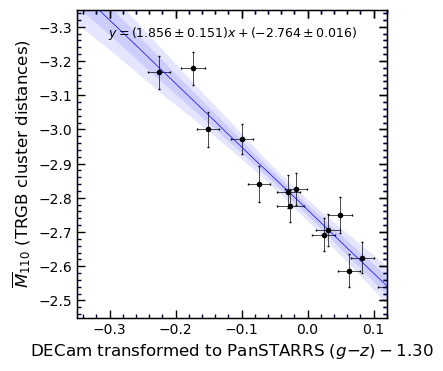

In [87]:
size = 600

mn = np.min(x)
mx = np.max(x)

# Use these for PS Mbar plots for consistent axis limits
#mn = 1.37
#mx = 1.553
#xlim = [1.34, 1.58]
#ylim = [-2.92,-2.4]

# use these for Mbar plots for the paper
xlim = [-0.35, 0.12] # for offset colors
# xlim = [1.1, 1.57] # for DECam
# xlim = [1.02, 1.49] # for PS
ylim = [-3.35, -2.45]

# Use these for consistent mbar plots:
#ylim = [28.0, 29.1]

R = mx - mn
xl = np.linspace(mn-2.3*R, mx+0.3*R, 100)

N = len(xl)
Y = np.ones(shape = (size,N))
i = 0 
for m, b, in samples[np.random.randint(len(samples), size=size)]:
    Y[i] = m*xl+b
    i+=1

# Compute percentiles
percentiles = np.percentile(Y, [16, 50, 84], axis=0)
yl = percentiles[1]
yue = percentiles[2] - percentiles[1]
yle = percentiles[1] - percentiles[0]

fig, ax = plt.subplots(figsize=(4, 4))

# Plotting with error bars and filling between percentiles
ax.errorbar(x, y, xerr=xerr, yerr=yerr, fmt=".k", capsize=1, elinewidth=0.5)
#ax.errorbar(x1, y1, xerr=x1err, yerr=y1err, fmt=".r", capsize=1, elinewidth=0.5)

ax.fill_between(xl, yl + 2 * yue, yl - 2 * yle, color='b', alpha=0.1, edgecolor="none")
ax.fill_between(xl, yl + yue, yl - yle, color='b', alpha=0.1, edgecolor="none")
ax.plot(xl, yl, color='b', linewidth=0.5)

ax.set_xlabel(xlabel, fontsize=12)
ax.set_ylabel(ylabel, fontsize=12)

# Add a fit line: 2.16*(g-z-1.45)-2.682
if oldline==True:
    xfit = [1.35,1.55]
    yfit = [2.16*(xfit[0]-1.45)-2.642,2.16*(xfit[1]-1.45)-2.642]
    ax.plot(xfit, yfit, color='green', linewidth=0.75, label='2015-2021 slope')

if oldlinePS==True:
    xfit = [1.26,1.45]
    yfit = [2.16*(xfit[0]-1.37)-2.656,2.16*(xfit[1]-1.37)-2.656]
    ax.plot(xfit, yfit, color='green', linewidth=0.75, label='2015-2021 slope')

textstr = ""
if legend==True:
    textstr = '\n'.join((
        figtitle,
        r'$y=({0:.3f} \pm {1:.3f})x + ({2:.3f} \pm {3:.3f})$'.format(M[0], (M[1]+M[2])/2., B[0], (B[1]+B[2])/2.)
    ))

# Define the position of the text annotation
props = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(0.1, 1, textstr, transform=ax.transAxes, fontsize=9,
        verticalalignment='top') #, bbox=props)

#_= set_axes(ax, fontsize=10)
_= set_axes(ax, xlim=xlim, ylim=ylim, fontsize=10)
_= set_axes(ax, ylim=ylim, fontsize=10)
plt.gca().invert_yaxis()

plt.savefig(outfile, format='pdf', bbox_inches='tight')
plt.show()

# Make plots for paper with multiple datasets/fits

In [173]:
newline=False
oldline=False
oldlinePS=False

# Define the path to your CSV file
csv_file_path = '/Users/Joe/data/SBF-Calibration2024/calibration-31Jan2025.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df


,Name,mM_TRGB,mM_TRGBsig,mM_TRGBsigtot,mM_TRGB_cluster,mM_TRGB_cluster_sig,mM_SBF_cluster,mM_SBF_cluster_sig,mM_SBF_ACS,mM_SBF_ACS_sig,...,DC2PSgzsig,DC2PSc0,DC2PSc1,DC2PSc2,DC2PSc5,DC2PSc1sig,DC2PSc2sig,(DC2PSgz-PSgz),DC2PS_wtavc12,DC2PS_wtavc12_sig
0,N4458,NaN,NaN,NaN,31.055,0.085,31.09,0.085,31.063,0.070,...,0.017,1.168,1.159,1.140,NaN,0.017,0.017,-0.025,1.149,0.012
1,N4472,31.091,0.032,0.071,31.055,0.085,31.09,0.085,31.116,0.075,...,0.017,1.396,1.387,1.379,1.366,0.017,0.017,0.013,1.383,0.012
2,N4489,NaN,NaN,NaN,31.055,0.085,31.09,0.085,30.935,0.069,...,0.018,1.152,1.132,1.121,NaN,0.018,0.018,0.018,1.126,0.013
3,N4649,31.061,0.034,0.072,31.055,0.085,31.09,0.085,31.082,0.079,...,0.018,1.459,1.442,1.409,1.373,0.018,0.018,0.014,1.426,0.013
4,N4636,31.120,0.035,0.072,31.055,0.085,NaN,NaN,NaN,NaN,...,0.018,1.374,1.351,1.312,1.273,0.018,0.018,0.006,1.332,0.013
5,N4552,30.933,0.041,0.075,31.055,0.085,31.09,0.085,31.021,0.073,...,0.018,1.392,1.365,1.334,1.289,0.018,0.018,-0.014,1.349,0.013
6,N4697,30.330,0.036,0.073,30.330,0.036,NaN,NaN,30.491,0.065,...,0.018,1.317,1.283,1.259,1.235,0.018,0.018,0.007,1.271,0.013
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,IC2006,NaN,NaN,NaN,31.424,0.053,31.51,0.053,31.525,0.086,...,0.017,1.310,1.287,1.261,1.211,0.020,0.020,NaN,1.274,0.014
9,N1344,NaN,NaN,NaN,31.424,0.053,31.51,0.053,31.603,0.068,...,0.017,1.230,1.213,1.189,1.169,0.017,0.017,NaN,1.201,0.012


In [213]:
# TRGB Mbar vs PanSTARRS colors and DECam translated to PS colors, all for c1
# Fit is just for cluster distances DECam colors (14 points)

df = pd.read_csv(csv_file_path)
df = df[["mbar110c1","mbar110c1sig","mM_TRGB_cluster","mM_TRGB_cluster_sig","DC2PSc1","DC2PSc1sig"]].dropna()
df2 = pd.read_csv(csv_file_path)
df2 = df2[["mbar110c2","mbar110c2sig","mM_TRGB_cluster","mM_TRGB_cluster_sig","DC2PSc2","DC2PSc2sig"]].dropna()
df3 = pd.read_csv(csv_file_path)
df3 = df3[["Mbar110c1","Mbar110c1sig","DC2PSc1","DC2PSc1sig"]].dropna()
df4 = pd.read_csv(csv_file_path)
df4 = df4[["Mbar110c1","Mbar110c1sig","PSgzc1","PSgzc1sig"]].dropna()

x = df.DC2PSc1.values - 1.30
y = df.mbar110c1.values - df.mM_TRGB_cluster.values
xerr = df.DC2PSc1sig.values
yerr = np.sqrt(df.mbar110c1sig.values**2 + df.mM_TRGB_cluster_sig.values**2)
label = 'c1 group distances (DECam)'

x2 = df2.DC2PSc2.values - 1.30
y2 = df2.mbar110c2.values - df2.mM_TRGB_cluster.values
xerr2 = df2.DC2PSc2sig.values
yerr2 = np.sqrt(df2.mbar110c2sig.values**2 + df2.mM_TRGB_cluster_sig.values**2)
label2 = 'c2 group distances (DECam)'

x3 = df3.DC2PSc1.values - 1.30
y3 = df3.Mbar110c1.values
xerr3 = df3.DC2PSc1sig.values
yerr3 = df3.Mbar110c1sig.values
label3 = 'c1 individual distances (DECam)'

x4 = df4.PSgzc1.values - 1.30
y4 = df4.Mbar110c1.values
xerr4 = df4.PSgzc1sig.values
yerr4 = df4.Mbar110c1sig.values
label4 = 'c1 individual distances (PanSTARRS)'

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)
ymodel = M[0]*x + B[0]
chisq = np.sum(((y-ymodel)/yerr)**2)
chisqred = chisq / (len(x)-2)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")
print(f"Reduced chi^2/dof = {chisqred:.2f}")
print(f"Number of points fitted = {len(x)}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_hybrid_c1_130_31Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'$(g{-}z)-1.30$'
ylabel=r'$\overline{{M}}_{{110}}$'
oldline=False
oldlinePS=False
newline=False

Slope (m): 1.919 +0.210 -0.201
Intercept (b): -2.760 +0.022 -0.020
Reduced chi^2/dof = 0.35
Number of points fitted = 14


In [215]:
# TRGB Mbar vs PanSTARRS colors and DECam translated to PS colors, all for c2
# Fit is just for cluster distances DECam colors (14 points)

df = pd.read_csv(csv_file_path)
df = df[["mbar110c2","mbar110c2sig","mM_TRGB_cluster","mM_TRGB_cluster_sig","DC2PSc2","DC2PSc2sig"]].dropna()

x = df.DC2PSc2.values - 1.30
y = df.mbar110c2.values - df.mM_TRGB_cluster.values
xerr = df.DC2PSc2sig.values
yerr = np.sqrt(df.mbar110c2sig.values**2 + df.mM_TRGB_cluster_sig.values**2)
label = 'c2 group distances (DECam)'

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)
ymodel = M[0]*x + B[0]
chisq = np.sum(((y-ymodel)/yerr)**2)
chisqred = chisq / (len(x)-2)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")
print(f"Reduced chi^2/dof = {chisqred:.2f}")
print(f"Number of points fitted = {len(x)}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_hybrid_c2_130_31Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'$(g{-}z)-1.30$'
ylabel=r'$\overline{{M}}_{{110}}$'
oldline=False
oldlinePS=False
newline=False

Slope (m): 1.754 +0.230 -0.224
Intercept (b): -2.766 +0.023 -0.022
Reduced chi^2/dof = 0.60
Number of points fitted = 14


In [217]:
# TRGB Mbar vs PanSTARRS colors and DECam translated to PS colors, weighted average of all good regions
# Fit is just for cluster distances DECam colors (14 points)

df = pd.read_csv(csv_file_path)
df = df[["mbar110","mbar110sig","mM_TRGB_cluster","mM_TRGB_cluster_sig","DC2PSgz","DC2PSgzsig"]].dropna()
df3 = pd.read_csv(csv_file_path)
df3 = df3[["Mbar110","Mbar110sig","DC2PSgz","DC2PSgzsig"]].dropna()
df4 = pd.read_csv(csv_file_path)
df4 = df4[["Mbar110","Mbar110sig","PSgz","PSgzsig"]].dropna()

x = df.DC2PSgz.values - 1.30
y = df.mbar110.values - df.mM_TRGB_cluster.values
xerr = df.DC2PSgzsig.values
yerr = np.sqrt(df.mbar110sig.values**2 + df.mM_TRGB_cluster_sig.values**2)
label = 'Cluster TRGB distances (DECam)'

x3 = df3.DC2PSgz.values - 1.30
y3 = df3.Mbar110.values
xerr3 = df3.DC2PSgzsig.values
yerr3 = df3.Mbar110sig.values
label3 = 'Individual TRGB distances (DECam)'

x4 = df4.PSgz.values - 1.30
y4 = df4.Mbar110.values
xerr4 = df4.PSgzsig.values
yerr4 = df4.Mbar110sig.values
label4 = 'Individual distances (PanSTARRS)'

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)
ymodel = M[0]*x + B[0]
chisq = np.sum(((y-ymodel)/yerr)**2)
chisqred = chisq / (len(x)-2)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")
print(f"Reduced chi^2/dof = {chisqred:.2f}")
print(f"Number of points fitted = {len(x)}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_hybrid_130_allgood_31Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'$(g{-}z)-1.30$'
ylabel=r'$\overline{{M}}_{{110}}$'
oldline=False
oldlinePS=False
newline=False

Slope (m): 1.948 +0.236 -0.224
Intercept (b): -2.753 +0.021 -0.021
Reduced chi^2/dof = 0.48
Number of points fitted = 14


In [280]:
# TRGB Cluster Mbar vs DECam (g-z) translated to PanSTARRS for weighted average of c1+c2
# This is the main fit for the paper.

df = pd.read_csv(csv_file_path)
df = df[["mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","mM_TRGB_cluster","mM_TRGB_cluster_sig","DC2PSc1","DC2PSc1sig","DC2PSc2","DC2PSc2sig","gzoffset"]].dropna()
df3 = pd.read_csv(csv_file_path)
df3 = df3[["Mbar110","Mbar110sig","DC2PSgz","DC2PSgzsig"]].dropna()
df4 = pd.read_csv(csv_file_path)
df4 = df4[["Mbar110","Mbar110sig","PSgz","PSgzsig"]].dropna()

x1 = df.DC2PSc1.values - 1.30
x2 = df.DC2PSc2.values - 1.30
#x = np.concatenate((x1, x2), axis=0)
y1 = df.mbar110c1.values - df.mM_TRGB_cluster.values
y2 = df.mbar110c2.values - df.mM_TRGB_cluster.values
#y = np.concatenate((y1, y2), axis=0)
xerr1 = df.DC2PSc1sig.values
xerr2 = df.DC2PSc2sig.values
xerr = np.sqrt(1/(1/xerr1**2+1/xerr2**2))
#xerr = np.concatenate((xerr1, xerr2), axis=0)
yerr1 = np.sqrt(df.mbar110c1sig.values**2 + df.mM_TRGB_cluster_sig.values**2)
yerr2 = np.sqrt(df.mbar110c2sig.values**2 + df.mM_TRGB_cluster_sig.values**2)
yerr = np.sqrt(1/(1/yerr1**2+1/yerr2**2))
#yerr = np.concatenate((yerr1, yerr2), axis=0)
x = (x1/xerr1**2 + x2/xerr2**2)/(1/xerr1**2 + 1/xerr2**2)
y = (y1/yerr1**2 + y2/yerr2**2)/(1/yerr1**2 + 1/yerr2**2)
label = 'Cluster TRGB distances (DECam)'

x3 = df3.DC2PSgz.values - 1.30
y3 = df3.Mbar110.values
xerr3 = df3.DC2PSgzsig.values
yerr3 = df3.Mbar110sig.values
label3 = 'Individual distances (DECam)'

x4 = df4.PSgz.values - 1.30
y4 = df4.Mbar110.values
xerr4 = df4.PSgzsig.values
yerr4 = df4.Mbar110sig.values
label4 = 'Individual distances (PanSTARRS)'

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)
ymodel = M[0]*x + B[0]
chisq = np.sum(((y-ymodel)/yerr)**2)
chisqred = chisq / (len(x)-2)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")
print(f"Reduced chi^2/dof = {chisqred:.2f}")
print(f"Number of points fitted = {len(x)}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_hybrid_c12av_130_31Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'$(g{-}z)-1.30$'
ylabel=r'$\overline{{M}}_{{110}}$'
oldline=False
oldlinePS=False

Slope (m): 1.863 +0.162 -0.156
Intercept (b): -2.760 +0.017 -0.016
Reduced chi^2/dof = 0.74
Number of points fitted = 14


In [283]:
# TRGB Cluster Mbar vs DECam (g-z) translated to PanSTARRS for weighted average of c1+c2, no offset
# This is the main plot for the paper.

df = pd.read_csv(csv_file_path)
df = df[["mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","mM_TRGB_cluster","mM_TRGB_cluster_sig","DC2PSc1","DC2PSc1sig","DC2PSc2","DC2PSc2sig","gzoffset"]].dropna()
df3 = pd.read_csv(csv_file_path)
df3 = df3[["Mbar110","Mbar110sig","DC2PSgz","DC2PSgzsig"]].dropna()
df4 = pd.read_csv(csv_file_path)
df4 = df4[["Mbar110","Mbar110sig","PSgz","PSgzsig"]].dropna()

x1 = df.DC2PSc1.values #- 1.30
x2 = df.DC2PSc2.values #- 1.30
#x = np.concatenate((x1, x2), axis=0)
y1 = df.mbar110c1.values - df.mM_TRGB_cluster.values
y2 = df.mbar110c2.values - df.mM_TRGB_cluster.values
#y = np.concatenate((y1, y2), axis=0)
xerr1 = df.DC2PSc1sig.values
xerr2 = df.DC2PSc2sig.values
xerr = np.sqrt(1/(1/xerr1**2+1/xerr2**2))
#xerr = np.concatenate((xerr1, xerr2), axis=0)
yerr1 = np.sqrt(df.mbar110c1sig.values**2 + df.mM_TRGB_cluster_sig.values**2)
yerr2 = np.sqrt(df.mbar110c2sig.values**2 + df.mM_TRGB_cluster_sig.values**2)
yerr = np.sqrt(1/(1/yerr1**2+1/yerr2**2))
#yerr = np.concatenate((yerr1, yerr2), axis=0)
x = (x1/xerr1**2 + x2/xerr2**2)/(1/xerr1**2 + 1/xerr2**2)
y = (y1/yerr1**2 + y2/yerr2**2)/(1/yerr1**2 + 1/yerr2**2)
label = 'Cluster TRGB distances (DECam)'

x3 = df3.DC2PSgz.values #- 1.30
y3 = df3.Mbar110.values
xerr3 = df3.DC2PSgzsig.values
yerr3 = df3.Mbar110sig.values
label3 = 'Individual distances (DECam)'

x4 = df4.PSgz.values #- 1.30
y4 = df4.Mbar110.values
xerr4 = df4.PSgzsig.values
yerr4 = df4.Mbar110sig.values
label4 = 'Individual distances (PanSTARRS)'

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)
ymodel = M[0]*x + B[0]
chisq = np.sum(((y-ymodel)/yerr)**2)
chisqred = chisq / (len(x)-2)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")
print(f"Reduced chi^2/dof = {chisqred:.2f}")
print(f"Number of points fitted = {len(x)}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_hybrid_c12av_31Jan2025.pdf"
figtitle = " "
legend = False
xlabel=r'$(g{-}z)_0$'
ylabel=r'$\overline{{M}}_{{110}}$'
oldline=False
oldlinePS=False

Slope (m): 1.865 +0.160 -0.155
Intercept (b): -5.183 +0.196 -0.204
Reduced chi^2/dof = 0.74
Number of points fitted = 14


In [278]:
# TRGB Cluster Mbar vs DECam (g-z) for weighted average of c1+c2

df = pd.read_csv(csv_file_path)
df = df[["mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","mM_TRGB_cluster","mM_TRGB_cluster_sig","DECamgzc1","DECamgzc1sig","DECamgzc2","DECamgzc2sig"]].dropna()

x1 = df.DECamgzc1.values - 1.40
x2 = df.DECamgzc2.values - 1.40
y1 = df.mbar110c1.values - df.mM_TRGB_cluster.values
y2 = df.mbar110c2.values - df.mM_TRGB_cluster.values
xerr1 = df.DECamgzc1sig.values
xerr2 = df.DECamgzc2sig.values
xerr = np.sqrt(1/(1/xerr1**2+1/xerr2**2))
yerr1 = np.sqrt(df.mbar110c1sig.values**2 + df.mM_TRGB_cluster_sig.values**2)
yerr2 = np.sqrt(df.mbar110c2sig.values**2 + df.mM_TRGB_cluster_sig.values**2)
yerr = np.sqrt(1/(1/yerr1**2+1/yerr2**2))
x = (x1/xerr1**2 + x2/xerr2**2)/(1/xerr1**2 + 1/xerr2**2)
y = (y1/yerr1**2 + y2/yerr2**2)/(1/yerr1**2 + 1/yerr2**2)
label = 'Cluster c1+c2 TRGB distances (DECam)'

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)
ymodel = M[0]*x + B[0]
chisq = np.sum(((y-ymodel)/yerr)**2)
chisqred = chisq / (len(x)-2)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")
print(f"Reduced chi^2/dof = {chisqred:.2f}")
print(f"Number of points fitted = {len(x)}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_DECam_140_c12av_31Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'$(g{-}z)_0-1.40$'
ylabel=r'$\overline{{M}}_{{110}}$'
oldline=False
oldlinePS=False

Slope (m): 1.753 +0.143 -0.140
Intercept (b): -2.728 +0.017 -0.017
Reduced chi^2/dof = 0.72
Number of points fitted = 14


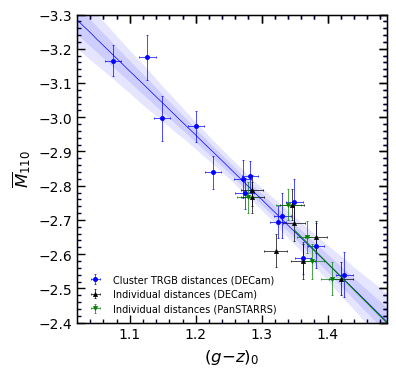

In [284]:
size = 600

mn = np.min(x)
mx = np.max(x)

# Use these for PS Mbar plots for consistent axis limits
#mn = 1.37
#mx = 1.553
#xlim = [1.34, 1.58]
#ylim = [-2.92,-2.4]

# use these for Mbar plots for the paper
xlim = [-0.28, 0.19] # for offset colors
# xlim = [1.1, 1.57] # for DECam
xlim = [1.02, 1.49] # for PS
#ylim = [-3.35, -2.45]
ylim = [-3.3, -2.4]

R = mx - mn
xl = np.linspace(mn-0.3*R, mx+0.3*R, 100)

N = len(xl)
Y = np.ones(shape = (size,N))
i = 0 
for m, b, in samples[np.random.randint(len(samples), size=size)]:
    Y[i] = m*xl+b
    i+=1

# Compute percentiles
percentiles = np.percentile(Y, [16, 50, 84], axis=0)
yl = percentiles[1]
yue = percentiles[2] - percentiles[1]
yle = percentiles[1] - percentiles[0]

fig, ax = plt.subplots(figsize=(4, 4))

# Plotting points with error bars and filling between percentiles
ax.errorbar(x, y, xerr=xerr, yerr=yerr, label=label, fmt='o', color='b', ms=3, mec='b', mfc='b', mew=0.5, capsize=1, capthick=0.5, elinewidth=0.5)
#ax.errorbar(x2, y2, xerr=xerr2, yerr=yerr2, label=label2, fmt='s', color='r', ms=3, mec='r', mfc='r', mew=0.5, capsize=1, capthick=0.5, elinewidth=0.5)
ax.errorbar(x3, y3, xerr=xerr3, yerr=yerr3, label=label3, fmt='^', color='k', ms=3, mec='k', mfc='k', mew=0.5, capsize=1, capthick=0.5, elinewidth=0.5)
ax.errorbar(x4, y4, xerr=xerr4, yerr=yerr4, label=label4, fmt='v', color='g', ms=3, mec='g', mfc='g', mew=0.5, capsize=1, capthick=0.5, elinewidth=0.5)

ax.fill_between(xl, yl + 2 * yue, yl - 2 * yle, color='b', alpha=0.1, edgecolor="none")
ax.fill_between(xl, yl + yue, yl - yle, color='b', alpha=0.1, edgecolor="none")
ax.plot(xl, yl, color='b', linewidth=0.5)

ax.set_xlabel(xlabel, fontsize=12)
ax.set_ylabel(ylabel, fontsize=12)

newline=True

# Add a fit line
if newline==True:
    xfit = [1.35,1.55]
    yfit = [1.934*(xfit[0]-1.37)-2.631,1.934*(xfit[1]-1.37)-2.631]
    ax.plot(xfit, yfit, color='green', linewidth=0.75, label='')

if oldlinePS==True:
    xfit = [1.26,1.45]
    yfit = [2.16*(xfit[0]-1.37)-2.656,2.16*(xfit[1]-1.37)-2.656]
    ax.plot(xfit, yfit, color='green', linewidth=0.75, label='2015-2021 slope')

textstr = ""
if legend==True:
    textstr = '\n'.join((
        figtitle,
        r'$y=({0:.3f} \pm {1:.3f})x + ({2:.3f} \pm {3:.3f})$'.format(M[0], (M[1]+M[2])/2., B[0], (B[1]+B[2])/2.),
        r'                              $\chi^2/{{\rm dof}}={0:.2f}$, $n={1:.0f}$'.format(chisqred,len(x)),
    ))
ax.legend(loc="lower left", fontsize=7, frameon=False)

# Define the position of the text annotation
props = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(0.1, 1, textstr, transform=ax.transAxes, fontsize=9,
        verticalalignment='top') #, bbox=props)

#_= set_axes(ax, fontsize=10)
_= set_axes(ax, xlim=xlim, ylim=ylim, fontsize=10)
_= set_axes(ax, ylim=ylim, fontsize=10)
plt.gca().invert_yaxis()

#outfile = "/Users/Joe/data/SBF-Calibration2024/temp.pdf"
plt.savefig(outfile, format='pdf', bbox_inches='tight')
plt.show()

In [209]:
# TRGB Individual Mbar vs DECam (g-z) translated to PanSTARRS for weighted average of c1+c2

df = pd.read_csv(csv_file_path)
df = df[["mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","mM_TRGB","mM_TRGBsig","DC2PSc1","DC2PSc1sig","DC2PSc2","DC2PSc2sig"]].dropna()
df3 = pd.read_csv(csv_file_path)
df3 = df3[["Mbar110","Mbar110sig","DC2PSgz","DC2PSgzsig"]].dropna()
df4 = pd.read_csv(csv_file_path)
df4 = df4[["Mbar110","Mbar110sig","PSgz","PSgzsig"]].dropna()

x1 = df.DC2PSc1.values - 1.30
x2 = df.DC2PSc2.values - 1.30
#x = np.concatenate((x1, x2), axis=0)
y1 = df.mbar110c1.values - df.mM_TRGB.values
y2 = df.mbar110c2.values - df.mM_TRGB.values
#y = np.concatenate((y1, y2), axis=0)
xerr1 = df.DC2PSc1sig.values
xerr2 = df.DC2PSc2sig.values
xerr = np.sqrt(1/(1/xerr1**2+1/xerr2**2))
#xerr = np.concatenate((xerr1, xerr2), axis=0)
yerr1 = np.sqrt(df.mbar110c1sig.values**2 + df.mM_TRGBsig.values**2)
yerr2 = np.sqrt(df.mbar110c2sig.values**2 + df.mM_TRGBsig.values**2)
yerr = np.sqrt(1/(1/yerr1**2+1/yerr2**2))
#yerr = np.concatenate((yerr1, yerr2), axis=0)
x = (x1/xerr1**2 + x2/xerr2**2)/(1/xerr1**2 + 1/xerr2**2)
y = (y1/yerr1**2 + y2/yerr2**2)/(1/yerr1**2 + 1/yerr2**2)
label = 'Individual c1+c2 distances (DECam)'

x3 = df3.DC2PSgz.values - 1.30
y3 = df3.Mbar110.values
xerr3 = df3.DC2PSgzsig.values
yerr3 = df3.Mbar110sig.values
label3 = 'Individual distances (DECam)'

x4 = df4.PSgz.values - 1.30
y4 = df4.Mbar110.values
xerr4 = df4.PSgzsig.values
yerr4 = df4.Mbar110sig.values
label4 = 'Individual distances (PanSTARRS)'

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

ymodel = M[0]*x + B[0]
chisq = np.sum(((y-ymodel)/yerr)**2)
chisqred = chisq / (len(x)-2)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")
print(f"Reduced chi^2/dof = {chisqred:.2f}")
print(f"Number of points fitted = {len(x)}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_DC2PS_c12av_31Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'$(g{-}z)_0 - 1.30$'
ylabel=r'$\overline{{M}}_{{110}}$'
oldline=False
oldlinePS=False

Slope (m): 1.678 +0.307 -0.282
Intercept (b): -2.762 +0.018 -0.019
Reduced chi^2/dof = 2.35
Number of points fitted = 8


In [206]:
# TRGB Individual Mbar vs PS (g-z) for weighted average of c1+c2

df = pd.read_csv(csv_file_path)
df = df[["mbar110c1","mbar110c1sig","mbar110c2","mbar110c2sig","mM_TRGB","mM_TRGBsig","PSgzc1","PSgzc1sig","PSgzc2","PSgzc2sig"]].dropna()
df3 = pd.read_csv(csv_file_path)
df3 = df3[["Mbar110","Mbar110sig","DC2PSgz","DC2PSgzsig"]].dropna()
df4 = pd.read_csv(csv_file_path)
df4 = df4[["Mbar110","Mbar110sig","PSgz","PSgzsig"]].dropna()

x1 = df.PSgzc1.values - 1.30
x2 = df.PSgzc2.values - 1.30
#x = np.concatenate((x1, x2), axis=0)
y1 = df.mbar110c1.values - df.mM_TRGB.values
y2 = df.mbar110c2.values - df.mM_TRGB.values
#y = np.concatenate((y1, y2), axis=0)
xerr1 = df.PSgzc1sig.values
xerr2 = df.PSgzc2sig.values
xerr = np.sqrt(1/(1/xerr1**2+1/xerr2**2))
#xerr = np.concatenate((xerr1, xerr2), axis=0)
yerr1 = np.sqrt(df.mbar110c1sig.values**2 + df.mM_TRGBsig.values**2)
yerr2 = np.sqrt(df.mbar110c2sig.values**2 + df.mM_TRGBsig.values**2)
yerr = np.sqrt(1/(1/yerr1**2+1/yerr2**2))
#yerr = np.concatenate((yerr1, yerr2), axis=0)
x = (x1/xerr1**2 + x2/xerr2**2)/(1/xerr1**2 + 1/xerr2**2)
y = (y1/yerr1**2 + y2/yerr2**2)/(1/yerr1**2 + 1/yerr2**2)
label = 'Individual c1+c2 distances (PanSTARRS)'

x3 = df3.DC2PSgz.values - 1.30
y3 = df3.Mbar110.values
xerr3 = df3.DC2PSgzsig.values
yerr3 = df3.Mbar110sig.values
label3 = 'Individual distances (DECam)'

x4 = df4.PSgz.values - 1.30
y4 = df4.Mbar110.values
xerr4 = df4.PSgzsig.values
yerr4 = df4.Mbar110sig.values
label4 = 'Individual distances (PanSTARRS)'

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)
ymodel = M[0]*x + B[0]
chisq = np.sum(((y-ymodel)/yerr)**2)
chisqred = chisq / (len(x)-2)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")
print(f"Reduced chi^2/dof = {chisqred:.2f}")
print(f"Number of points fitted = {len(x)}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_PS_c12av_31Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'$(g{-}z)_0 - 1.30$'
ylabel=r'$\overline{{M}}_{{110}}$'
oldline=False
oldlinePS=False

Slope (m): 1.834 +0.358 -0.325
Intercept (b): -2.784 +0.024 -0.026
Reduced chi^2/dof = 1.19
Number of points fitted = 5


In [176]:
# Mbar vs. DECam (g-z) for 8 calibrators, c1+c2
df = pd.read_csv(csv_file_path)
df = df[["Mbar110c1","Mbar110c1sig","DECamgzc1","DECamgzc1sig","gzoffset"]].dropna()

x = df.DECamgzc1.values - df.gzoffset.values
y = df.Mbar110c1.values
xerr = df.DECamgzc1sig.values
yerr= df.Mbar110c1sig.values

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/Mbar_DECam_c1_145_24Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'DECam $(g{{-}}z)-1.45$'
ylabel=r'$\overline{{M}}_{{110}}$'
oldline = False

Slope (m): 1.339 +0.330 -0.307
Intercept (b): -2.651 +0.017 -0.017


### Check the color conversion ###

In [271]:
# Let's plot DC2PS colors vs. PS colors
df = pd.read_csv(csv_file_path)
df = df[["DC2PS_wtavc12","DC2PS_wtavc12_sig","DC2PSc1","DC2PSc1sig","DC2PSc2","DC2PSc2sig","PSgz_wtavc12","PSgz_wtavc12sig","PSgzc1","PSgzc1sig","PSgzc2","PSgzc2sig"]].dropna()

x = df.PSgz_wtavc12.values
y = df.DC2PS_wtavc12.values
xerr = df.PSgz_wtavc12sig.values
yerr = df.DC2PS_wtavc12_sig.values
label = 'c1+c2'

x2 = df.PSgzc1.values
y2 = df.DC2PSc1.values
xerr2 = df.PSgzc1sig.values
yerr2 = df.DC2PSc1sig.values
label2 = 'c1'

x3 = df.PSgzc2.values
y3 = df.DC2PSc2.values
xerr3 = df.PSgzc2sig.values
yerr3 = df.DC2PSc2sig.values
label3 = 'c2'

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/data/SBF-Calibration2024/DC2PSvsPS_wtavc12_4Feb2025.pdf"
figtitle = " "
legend = False
xlabel=r'PanSTARRS $(g{{-}}z)_0$'
ylabel=r'DECam converted to PS $(g{{-}}z)_0$'
oldline = False

Slope (m): 0.993 +0.083 -0.074
Intercept (b): 0.007 +0.098 -0.109


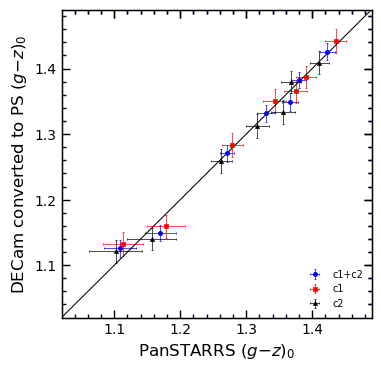

In [272]:
size = 600

mn = np.min(x)
mx = np.max(x)

# Use these for PS Mbar plots for consistent axis limits
#mn = 1.37
#mx = 1.553
#xlim = [1.34, 1.58]
#ylim = [-2.92,-2.4]

# use these for Mbar plots for the paper
xlim = [1.02, 1.49] # for PS
ylim = [1.02, 1.49] # for PS

R = mx - mn
xl = np.linspace(mn-0.3*R, mx+0.3*R, 100)

N = len(xl)
Y = np.ones(shape = (size,N))
i = 0 
for m, b, in samples[np.random.randint(len(samples), size=size)]:
    Y[i] = m*xl+b
    i+=1

# Compute percentiles
percentiles = np.percentile(Y, [16, 50, 84], axis=0)
yl = percentiles[1]
yue = percentiles[2] - percentiles[1]
yle = percentiles[1] - percentiles[0]

fig, ax = plt.subplots(figsize=(4, 4))

# Plotting points with error bars and filling between percentiles
ax.errorbar(x, y, xerr=xerr, yerr=yerr, label=label, fmt='o', color='b', ms=3, mec='b', mfc='b', mew=0.5, capsize=1, capthick=0.5, elinewidth=0.5)
# ax.errorbar(x2, y2, xerr=xerr2, yerr=yerr2, label=label2, fmt='s', color='r', ms=3, mec='r', mfc='r', mew=0.5, capsize=1, capthick=0.5, elinewidth=0.5)
# ax.errorbar(x3, y3, xerr=xerr3, yerr=yerr3, label=label3, fmt='^', color='k', ms=3, mec='k', mfc='k', mew=0.5, capsize=1, capthick=0.5, elinewidth=0.5)

#ax.fill_between(xl, yl + 2 * yue, yl - 2 * yle, color='b', alpha=0.1, edgecolor="none")
#ax.fill_between(xl, yl + yue, yl - yle, color='b', alpha=0.1, edgecolor="none")
#ax.plot(xl, yl, color='b', linewidth=0.5)

ax.set_xlabel(xlabel, fontsize=12)
ax.set_ylabel(ylabel, fontsize=12)

xfit = [1,2]
yfit = [1,2]
ax.plot(xfit, yfit, color='k', linewidth=0.75, label='')

textstr = ""
if legend==True:
    textstr = '\n'.join((
        figtitle,
        r'$y=({0:.3f} \pm {1:.3f})x + ({2:.3f} \pm {3:.3f})$'.format(M[0], (M[1]+M[2])/2., B[0], (B[1]+B[2])/2.),
        r'                              $\chi^2/{{\rm dof}}={0:.2f}$, $n={1:.0f}$'.format(chisqred,len(x)),
    ))
# ax.legend(loc="lower right", fontsize=7, frameon=False)

# Define the position of the text annotation
props = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(0.1, 1, textstr, transform=ax.transAxes, fontsize=9,
        verticalalignment='top') #, bbox=props)

#_= set_axes(ax, fontsize=10)
_= set_axes(ax, xlim=xlim, ylim=ylim, fontsize=10)
_= set_axes(ax, ylim=ylim, fontsize=10)
#plt.gca().invert_yaxis()

outfile = "/Users/Joe/data/SBF-Calibration2024/DC2PSvsPS_wtavc12_4Feb2025.pdf"
# outfile = "/Users/Joe/data/SBF-Calibration2024/DC2PSvsPS_hybrid_4Feb2025.pdf"

plt.savefig(outfile, format='pdf', bbox_inches='tight')
plt.show()

In [207]:
## To read the docstring of linMC, uncomment the following line
# linMC?